# Python Libraries

In [4]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import datetime
import time
from datetime import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('max_colwidth', -1)

<ipython-input-5-af59b17b2a7e>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


# Importing/Loading of Kaggle Google App Dataset

In [6]:
filepath = "/Users/ketansahu/Documents/DataEngineeringProject/GitHubRepo/googleplaystore.csv"
df = pd.read_csv(filepath ,encoding='utf-8')
col_name = ['app',  'category', 'rating', 'reviews', 'app_size', 'installs', 'app_type', 'price', 'content_rating', 'genres', 'last_updated', 'current_version', 'android_version']
df.columns = col_name
df

,app,category,rating,reviews,app_size,installs,app_type,price,content_rating,genres,last_updated,current_version,android_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10835,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10836,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10837,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
#Add 200 Random user_id
df["user_id"] = np.random.randint(1, 200, len(df))
#Add download date between 2020-01-01 and 2021-01-01
#df["download_date"] = np.random.choice(pd.date_range('2020-01-01', '2021-01-01'), len(df))
df["download_date"] = pd.date_range('today', periods=len(df), freq='30min')
#reindex the column order
df = df.reindex(columns=['download_date', 'user_id', 'app',  'category', 'rating', 'reviews', 'app_size', 'installs', 'app_type', 'price', 'content_rating', 'genres', 'last_updated', 'current_version', 'android_version'])
#Sort the Dataframe based on the the download_date
df = df.sort_values('download_date')
#reset the index=row numbers
df = df.reset_index(drop =True)
df

,download_date,user_id,app,category,rating,reviews,app_size,installs,app_type,price,content_rating,genres,last_updated,current_version,android_version
0,2021-03-28 15:03:23.464784,158,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,2021-03-28 15:33:23.464784,188,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2021-03-28 16:03:23.464784,112,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,2021-03-28 16:33:23.464784,23,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,2021-03-28 17:03:23.464784,69,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2021-11-09 08:03:23.464784,3,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10835,2021-11-09 08:33:23.464784,48,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10836,2021-11-09 09:03:23.464784,122,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10837,2021-11-09 09:33:23.464784,121,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# App Details

In [22]:
#Assign app_id to each unique app in the dataset
df['app_id'] = df.groupby(['app']).ngroup()
df['app_id'] = df['app_id'].map(lambda q: q+500)

In [23]:
#Total unique app in the data set
df_app = df['app'].unique()
len(df_app)

9659

# Fake User Details Dataset

In [24]:
from faker import Faker
fake = Faker()
n = 300
faker_data = pd.DataFrame([[fake.name(), np.random.randint(18,65), fake.state()] for _ in range(n)],
     columns=['user_name', 'user_age', 'user_location'])
user_id = pd.factorize(faker_data.apply(tuple, axis=1))[0] + 1
faker_data.insert(loc=0, column='user_id', value=user_id)
faker_data.head(30)

,user_id,user_name,user_age,user_location
0,1,Julie Lopez,38,New Mexico
1,2,Robert Jackson,18,North Dakota
2,3,Marcus Ball,54,South Carolina
3,4,Katherine Anderson,60,Massachusetts
4,5,Melissa Nguyen,61,Indiana
5,6,Kevin Roberts,51,West Virginia
6,7,Mark Howe,61,Massachusetts
7,8,Nancy Herrera,36,Alabama
8,9,Joseph Guzman,60,Virginia
9,10,Elizabeth Ross,27,Alabama


# Data Merge (Kaggle Google App Data + Fake User Details Data)

In [25]:
#Merge Faker data to kaggle data on left
users_app_data = df.merge(faker_data, on='user_id', how='left')
#Add time spent column
users_app_data['time_spent_min'] = np.random.randint(90, 400, len(users_app_data))
users_app_data['user_details'] = users_app_data['user_name'] + ', ' + users_app_data['user_age'].astype(str) + ', ' + users_app_data['user_location'] + ', ' + users_app_data['time_spent_min'].astype(str)
users_app_data = users_app_data.drop(['user_name', 'user_age', 'user_location', 'time_spent_min'], 1)
users_app_data

,download_date,user_id,app,category,rating,reviews,app_size,installs,app_type,price,content_rating,genres,last_updated,current_version,android_version,app_id,user_details
0,2020-01-01,71,Sir C J New Primary School,FAMILY,5.0,3,9.2M,100+,Free,0,Everyone,Education,"July 25, 2018",1.0.10,4.0 and up,8317,"Madison Bowers, 19, Iowa, 180"
1,2020-01-01,104,Chrome Beta,PRODUCTIVITY,4.4,228794,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",68.0.3440.91,Varies with device,3029,"Dustin Mitchell, 19, Montana, 227"
2,2020-01-01,58,DC Comics,COMICS,4.2,25671,Varies with device,"1,000,000+",Free,0,Teen,Comics,"June 5, 2018",Varies with device,Varies with device,3336,"Eric Sanchez, 18, Florida, 324"
3,2020-01-01,194,Snapfish,PHOTOGRAPHY,4.1,32398,28M,"1,000,000+",Free,0,Everyone,Photography,"August 1, 2018",9.6.4,4.4 and up,8390,"Alyssa Morales, 59, Pennsylvania, 312"
4,2020-01-01,194,KLM - Royal Dutch Airlines,TRAVEL_AND_LOCAL,3.7,7705,40M,"1,000,000+",Free,0,Everyone,Travel & Local,"August 6, 2018",9.7.1,4.1 and up,6037,"Alyssa Morales, 59, Pennsylvania, 178"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2021-01-01,119,Official Matsumoto Kiyoshi application,LIFESTYLE,3.2,3031,2.7M,"1,000,000+",Free,0,Everyone,Lifestyle,"July 3, 2018",1.5.3,4.0 and up,7204,"Timothy Hansen, 36, South Carolina, 332"
10835,2021-01-01,24,Pacific Navy Fighter C.E. (AS),GAME,4.3,11379,20M,"500,000+",Free,0,Everyone 10+,Arcade,"July 29, 2018",1.4,4.0.3 and up,7361,"Ruth Allen, 46, New York, 273"
10836,2021-01-01,197,"AE + Aerie: Jeans, Dresses, Swimsuits & Bralettes",SHOPPING,4.2,20476,28M,"1,000,000+",Free,0,Everyone,Shopping,"July 17, 2018",5.6.0,4.4 and up,685,"Jeremy Allen DDS, 22, Ohio, 351"
10837,2021-01-01,26,CB On Mobile,COMMUNICATION,4.1,901,323k,"100,000+",Free,0,Teen,Communication,"April 26, 2017",1.0.5,4.0 and up,2418,"Peter Day, 18, Kentucky, 311"


# Data Cleanig

In [26]:
#Check Total Duplicates
(users_app_data.duplicated().value_counts()/users_app_data.shape[0])*100

False    100.0
dtype: float64

In [27]:
# Fill Nan in rating data
rating_data=users_app_data[pd.notnull(users_app_data['rating'])]
median=np.median(rating_data['rating'])
users_app_data['rating'].fillna(median,inplace=True)

users_app_data.dropna(inplace=True)

# Data Preprocessing

In [28]:
# converting last date
users_app_data['last_updated']=pd.to_datetime(users_app_data['last_updated'])
users_app_data['last_updated'] = users_app_data['last_updated'].dt.strftime('%Y-%m-%d')
users_app_data['last_updated'] = users_app_data['last_updated'].astype('datetime64[ns]')

In [29]:
# convert datatype to integer
users_app_data['rating'] = pd.to_numeric(users_app_data['rating'], errors='coerce')
users_app_data['reviews'] = pd.to_numeric(users_app_data['reviews'], errors='coerce')
users_app_data['installs'] = users_app_data['installs'].str.replace(',','').str.replace('+','').astype('int')
users_app_data['app_size'] = users_app_data['app_size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')
users_app_data['price'] = users_app_data['price'].str.replace('$','').astype('float')

In [30]:
users_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 0 to 10838
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   download_date    10828 non-null  datetime64[ns]
 1   user_id          10828 non-null  int64         
 2   app              10828 non-null  object        
 3   category         10828 non-null  object        
 4   rating           10828 non-null  float64       
 5   reviews          10828 non-null  int64         
 6   app_size         10828 non-null  float64       
 7   installs         10828 non-null  int64         
 8   app_type         10828 non-null  object        
 9   price            10828 non-null  float64       
 10  content_rating   10828 non-null  object        
 11  genres           10828 non-null  object        
 12  last_updated     10828 non-null  datetime64[ns]
 13  current_version  10828 non-null  object        
 14  android_version  10828 non-null  objec

In [124]:
users_app_data.index.names = ['event_id']
users_app_data.to_csv('users_app_data_batch.csv')

In [120]:
#df1 = df[0:5000]
#df2 = df[df.duplicated(['user_id','app_id'], keep=False)]
#df2.to_json (r'Export_DataFrame.json')
# for i in df2.index:
#     # convert the row to json
#     export = df2.loc[i].to_json()
#     # print the returncode
#     print(export)
#df2

In [58]:
# nan_rows = df[df['rating'].isnull()]
# nan_rows

In [59]:
#df1.to_csv('temp_data.csv', index =False)

# Data Visualtization

In [241]:
mask = (df['download_date'] == '2020-01-01')
df = df.loc[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   download_date    25 non-null     datetime64[ns]
 1   user_id          25 non-null     int64         
 2   app              25 non-null     object        
 3   category         25 non-null     object        
 4   rating           25 non-null     float64       
 5   reviews          25 non-null     int64         
 6   size             25 non-null     float64       
 7   installs         25 non-null     int64         
 8   type             25 non-null     object        
 9   price            25 non-null     float64       
 10  content_rating   25 non-null     object        
 11  genres           25 non-null     object        
 12  last_updated     25 non-null     datetime64[ns]
 13  current_version  25 non-null     object        
 14  android_version  25 non-null     object     

In [34]:
#users_app_data = users_app_data[users_app_data["download_date"].isin(pd.date_range('2020-01-01', '2020-02-01'))]
startdate = str(users_app_data['download_date'].iloc[0])
enddate = str(users_app_data['download_date'].iloc[500])
users_app_data = users_app_data[users_app_data["download_date"].isin(pd.date_range(startdate,enddate))]
data = [users_app_data.loc[users_app_data['download_date']==i] for i in users_app_data.download_date.unique()]
data[0:100]

[   download_date  user_id                                                 app  \
 0  2020-01-01     71       Sir C J New Primary School                           
 1  2020-01-01     104      Chrome Beta                                          
 2  2020-01-01     58       DC Comics                                            
 3  2020-01-01     194      Snapfish                                             
 4  2020-01-01     194      KLM - Royal Dutch Airlines                           
 5  2020-01-01     141      Super Hearing Super Ear Amplifier                    
 6  2020-01-01     187      GO Launcher EX UI5.0 theme                           
 7  2020-01-01     94       FG Rockstar                                          
 8  2020-01-01     184      YAY - TBH                                            
 9  2020-01-01     105      Robinhood - Investing, No Fees                       
 10 2020-01-01     187      Notepad                                              
 11 2020-01-01  

In [260]:

#daterange.to_csv('temp_data.csv', index =False)

In [261]:
Dup = daterange[daterange.duplicated(['user_id'], keep=False)]
Dup

,download_date,user_id,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_version,android_version,app_id,user_details
0,2020-01-01,122,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,25000000.0,100000,Paid,24.99,Everyone,Medical,2018-05-25,2018.5.47,5.0 and up,5777,"Courtney Olson, 38, Massachusetts, 288"
1,2020-01-01,182,BW Smart,TOOLS,3.7,50,19000000.0,5000,Free,0.00,Everyone,Tools,2017-06-06,v1.2.2,4.0 and up,1828,"Sheila Morris DVM, 32, Colorado, 305"
2,2020-01-01,154,Easy V-Bux free,FAMILY,4.6,856,2900000.0,5000,Free,0.00,Everyone,Entertainment,2018-07-17,1.0,2.1 and up,4364,"Jesse Hurley, 61, Missouri, 187"
3,2020-01-01,80,BH Mission Playbook,TRAVEL_AND_LOCAL,4.3,0,22000000.0,100,Free,0.00,Everyone,Travel & Local,2018-04-02,1.5.4,4.4 and up,1577,"Jonathan Chan, 57, New York, 170"
4,2020-01-01,142,MegaNDS (NDS Emulator),GAME,3.4,2218,11000000.0,500000,Free,0.00,Everyone,Arcade,2017-10-18,2.0,4.0 and up,6630,"Christopher Hernandez, 19, Kansas, 148"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,2020-12-01,147,To-Do Calendar Planner,PRODUCTIVITY,4.2,30291,0.0,1000000,Free,0.00,Everyone,Productivity,2018-05-29,Varies with device,Varies with device,8995,"Rebecca Evans, 40, Hawaii, 217"
9911,2020-12-01,190,"HD Video Player (wmv,avi,mp4,flv,av,mpg,mkv)2017",VIDEO_PLAYERS,3.3,171,4800000.0,10000,Free,0.00,Everyone,Video Players & Editors,2017-08-10,1.1,4.1 and up,5552,"Brittany Morales, 20, Rhode Island, 220"
9912,2020-12-01,136,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",SHOPPING,4.5,973270,20000000.0,50000000,Free,0.00,Teen,Shopping,2018-08-06,2.4.9,4.1 and up,10020,"Sara Ross, 30, Oklahoma, 317"
9913,2020-12-01,175,TV Guide BR Gold,FAMILY,4.4,544,0.0,5000,Paid,1.49,Everyone,Entertainment,2017-08-20,Varies with device,Varies with device,8732,"Becky Davis, 28, Wisconsin, 362"


In [341]:
print(daterange.shape)

(30, 18)


<AxesSubplot:xlabel='category'>

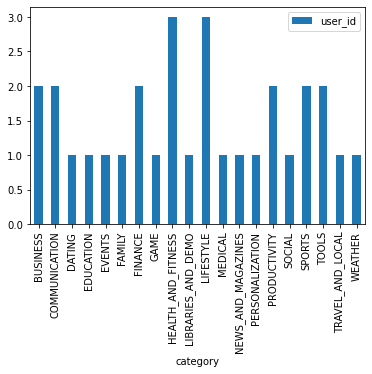

In [342]:
daterange.groupby('category').count().plot(y='user_id', kind='bar')

<AxesSubplot:xlabel='user_id'>

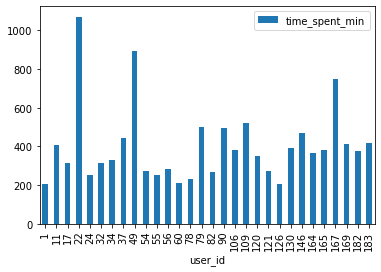

In [534]:
daterange.groupby('user_id').sum().plot(y='time_spent_min', kind='bar')

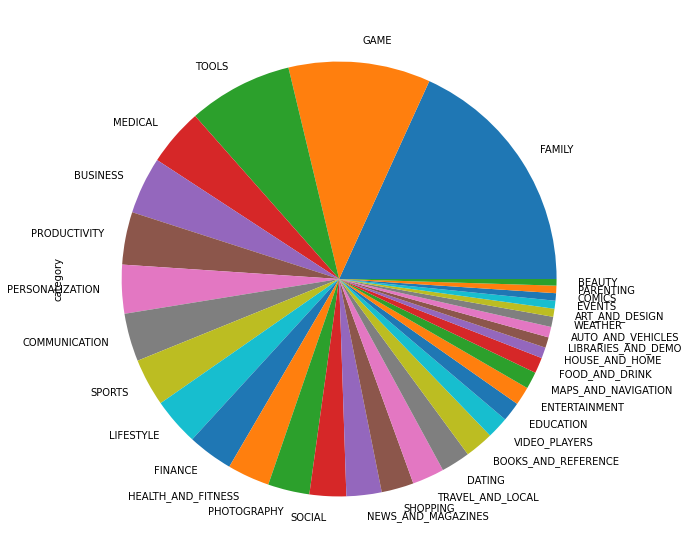

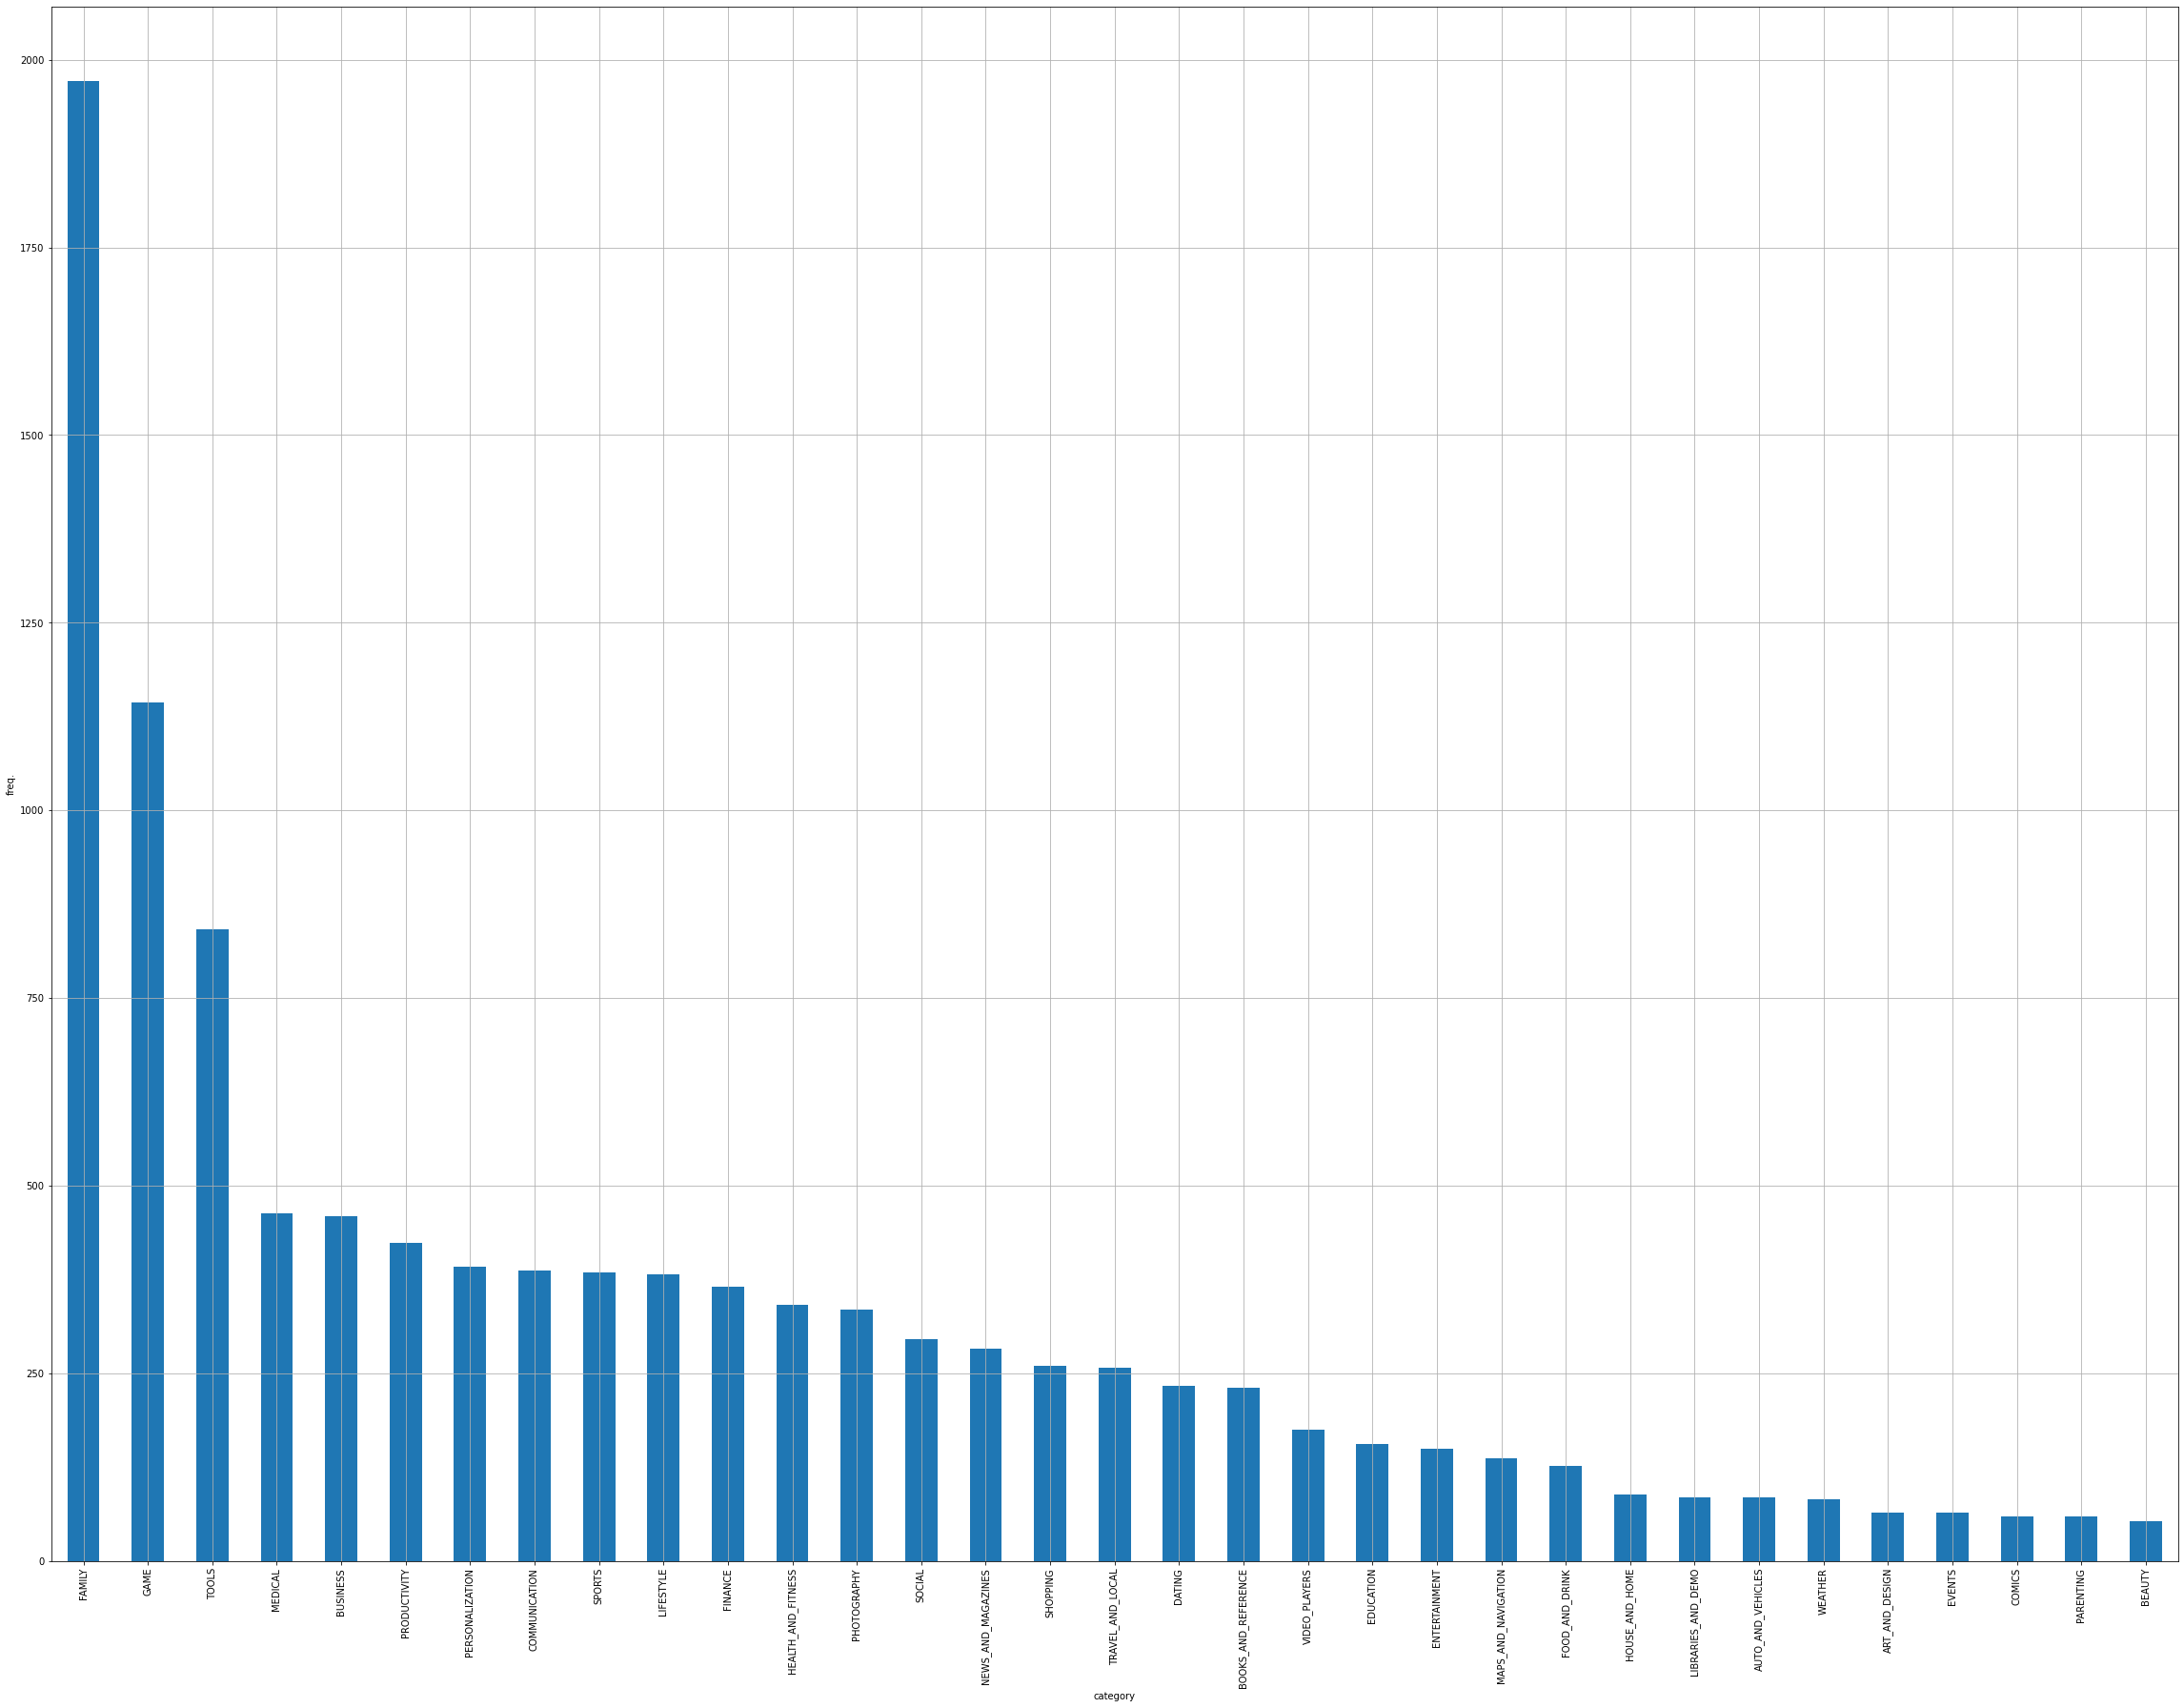

In [338]:
# most Most popular category
plt.figure(figsize=(40,10))
df['category'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(40,30))
df['category'].value_counts().plot(kind='bar')
plt.xlabel('category')
plt.ylabel('freq.')
plt.grid()
plt.show()

In [277]:
import json
import boto3
#json.loads take a string as input and returns a dictionary as output.
#json.dumps take a dictionary as input and returns a string as output.

In [278]:
dict_record = {"InvoiceNo": 536370, "StockCode": 22728, "Description": "ALARM CLOCK BAKELIKE PINK", "Quantity": 24, "InvoiceDate": "12/1/2010 8:45", "UnitPrice": 3.75, "CustomerID": 12583, "Country": "France"}

In [279]:
inventory_key = dict()
#create export dictionary
ex_dynamoRecord = dict()

In [280]:
inventory_key.update({'InvoiceNo': {"N": str(dict_record['InvoiceNo'])}})
inventory_key.update({'CustomerID': {"N": str(dict_record['CustomerID'])}})
print(inventory_key)

{'InvoiceNo': {'N': '536370'}, 'CustomerID': {'N': '12583'}}


In [281]:
stock_dict = dict(dict_record)
print(stock_dict)

{'InvoiceNo': 536370, 'StockCode': 22728, 'Description': 'ALARM CLOCK BAKELIKE PINK', 'Quantity': 24, 'InvoiceDate': '12/1/2010 8:45', 'UnitPrice': 3.75, 'CustomerID': 12583, 'Country': 'France'}


In [282]:
stock_dict.pop('InvoiceNo',None)
stock_dict.pop('StockCode',None)
stock_dict.pop('Quantity',None)
print(stock_dict)

{'Description': 'ALARM CLOCK BAKELIKE PINK', 'InvoiceDate': '12/1/2010 8:45', 'UnitPrice': 3.75, 'CustomerID': 12583, 'Country': 'France'}


In [283]:
stock_json = json.dumps(stock_dict)
print(stock_json)

{"Description": "ALARM CLOCK BAKELIKE PINK", "InvoiceDate": "12/1/2010 8:45", "UnitPrice": 3.75, "CustomerID": 12583, "Country": "France"}


In [284]:
#add the stock json to the column with the name of the stock number
ex_dynamoRecord.update({str(dict_record['StockCode']): {'Value':{"S":stock_json},"Action":"PUT"}})
ex_dynamoRecord.update({str(dict_record['Quantity']): {'Value':{"S":stock_json},"Action":"PUT"}})
print(ex_dynamoRecord)

{'22728': {'Value': {'S': '{"Description": "ALARM CLOCK BAKELIKE PINK", "InvoiceDate": "12/1/2010 8:45", "UnitPrice": 3.75, "CustomerID": 12583, "Country": "France"}'}, 'Action': 'PUT'}, '24': {'Value': {'S': '{"Description": "ALARM CLOCK BAKELIKE PINK", "InvoiceDate": "12/1/2010 8:45", "UnitPrice": 3.75, "CustomerID": 12583, "Country": "France"}'}, 'Action': 'PUT'}}


In [289]:
dictionary = daterange.set_index('user_id').T.to_dict('list')
np.save('my_file.npy', dictionary) 

<ipython-input-289-46f8a3d2696e>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  daterange.set_index('user_id').T.to_dict('list')


{122: [Timestamp('2020-12-01 00:00:00'),
  'Be Fabulous PHOTO BOOTH',
  'PHOTOGRAPHY',
  4.1,
  560,
  1700000.0,
  10000,
  'Free',
  0.0,
  'Everyone',
  'Photography',
  Timestamp('2017-02-01 00:00:00'),
  '1.07',
  '4.0 and up',
  1980,
  'Courtney Olson, 38, Massachusetts, 341'],
 182: [Timestamp('2020-11-12 00:00:00'),
  'FVD Ad-Free',
  'TOOLS',
  4.4,
  1774,
  4100000.0,
  10000,
  'Paid',
  1.99,
  'Everyone',
  'Tools',
  Timestamp('2017-10-05 00:00:00'),
  '4.4.3',
  '3.0 and up',
  4820,
  'Sheila Morris DVM, 32, Colorado, 306'],
 154: [Timestamp('2020-11-28 00:00:00'),
  'BC Liquor Stores',
  'LIFESTYLE',
  3.7,
  492,
  4300000.0,
  50000,
  'Free',
  0.0,
  'Everyone',
  'Lifestyle',
  Timestamp('2015-10-05 00:00:00'),
  '3.6',
  '2.2 and up',
  1478,
  'Jesse Hurley, 61, Missouri, 142'],
 80: [Timestamp('2020-11-28 00:00:00'),
  'Food Network',
  'FAMILY',
  4.1,
  7823,
  0.0,
  500000,
  'Free',
  0.0,
  'Teen',
  'Entertainment',
  Timestamp('2018-07-27 00:00:00'),
